This assignment is completed by:

David Cui B00788648

Hemant Kumar Singh B00774756

This notebook contains Q1 to Q4 and Q6. Q5 is in the other notebook, sorry for the inconvenience.

# Q1

In [1]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

pattern1 = np.loadtxt('pattern1.txt')

#reshape 12x13 matrix to 1x156 matrix
x_train = pattern1.reshape(26, 156)
#label is ascii code of capitalized alphabets
y_train = np.arange(65, 91)

Sklearn is used for the MLP model.

I used a hidden layer of 1.

I experimented with number of hidden nodes, I plotted some loss curves, seems like model with more nodes converges faster.

But for this problem, I am only training on data without using any test data, so nodes doesn't matter much as long as it converges eventually.

I will just use 100 nodes for now.

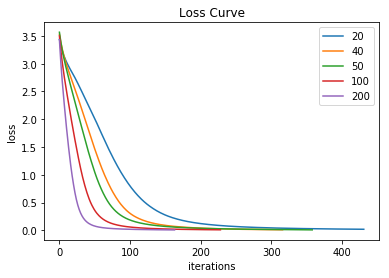

In [2]:
plt.ylabel('loss')
plt.xlabel('iterations')
plt.title("Loss Curve")

mlp = MLPClassifier(hidden_layer_sizes=(20,), max_iter=1000)
mlp.fit(x_train, y_train)
plt.plot(mlp.loss_curve_, label='20')

mlp = MLPClassifier(hidden_layer_sizes=(40,), max_iter=1000)
mlp.fit(x_train, y_train)
plt.plot(mlp.loss_curve_, label='40')

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000)
mlp.fit(x_train, y_train)
plt.plot(mlp.loss_curve_, label='50')

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(x_train, y_train)
plt.plot(mlp.loss_curve_, label='100')

mlp = MLPClassifier(hidden_layer_sizes=(200,), max_iter=1000)
mlp.fit(x_train, y_train)
plt.plot(mlp.loss_curve_, label='200')

plt.legend()
plt.show()

Now, I will create a training curve based on accuracy vs iteration.

MLPClassifier with warm_start and max_iter of 1 is used to train the model in 1 iteration increments.

The accuracy of the model on the training data for each iteration is found with mlp.score.

This score is the same as np.mean(y_train == predictions), so it is the accuracy.

The score from each iteration is plotted together as the training curve.

I made the model 1 hidden layer with 100 hidden nodes.

C:\Users\david2\Downloads\WPy-3662\python-3.6.6.amd64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


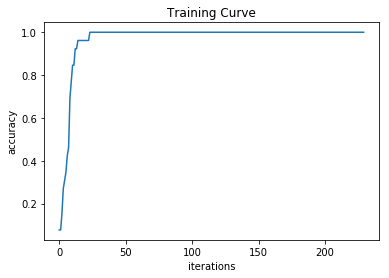

In [4]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1, verbose=False, warm_start=True)

scores = np.array([])

#stops at 230 iterations because this model converges before 230 iterations, shown when verbose is true.
for i in range (0, 230):
    mlp.fit(x_train, y_train)
    scores = np.append(scores, mlp.score(x_train, y_train))
    
plt.ylabel('accuracy')
plt.xlabel('iterations')
plt.title("Training Curve")
plt.plot(scores)
plt.show()

Interpretation:

The accuracy training curve is similar to the loss curve because as loss goes down, accuracy goes up.

The training curve shows that as iterations or epochs goes up, the accuracy improves and loss decreases, so the MLP model's memory of pattern 1 is getting better in each iteration. As iteration increases, the model memorizes the patterns better and can eventually label the training data correctly for 100% of the times.

The training curve shows that by approximately 25th iterations, the model has memorized pattern 1 completely and is 100% accurate for predicting pattern 1. Of course, that doesn't tell anything about whether the model can generalize patterns with noise.

It's interesting to note that although the accuracy has reached 100% at 25th iteration, the loss curves from the nodes experiment show that model loss converges at about 230th iterations for 100 nodes. So, the loss can still be improved after 100% accuracy on training data is reached.

# Q2

I created the add_noise function to add noise to pattern 1.

My algorithm is basically creating an array of size 156 with 0s and 1s, and XOR this array with each of the 26 array of pattern 1, so the 0 or 1 in pattern 1 will be flipped after the XOR if the corresponding entry in my noise array is 1. The number of 1s in the noise array (the number of flips) is determined by the percent_noise:
    
    I create a 1x156 noise array full of zeros.
    I switch ceiling of "percent_noise * 156" number of the zeros to ones.
    I XOR the noise array with pattern, creating noise in pattern. I also shuffle the noise array before each XOR to add some randomness on each of the noise.
    
I used ceil instead of floor, so my noise will be slighty more than the percent_noise.

In [5]:
import math

def add_noise(pattern, percent_noise):
    noisy_pattern = []
    
    num_to_flip = math.ceil(percent_noise * 156)
    noise = np.zeros(156)
    noise[0:num_to_flip] = 1
    noise = noise.astype(int)
    
    for i in range(0, 26):
        np.random.shuffle(noise)
        noisy_pattern.append(pattern[i].astype(int) ^ noise)
    
    return noisy_pattern

Here I created some noisy patterns by adding noise to pattern 1 from 0% noise to 60% noise, I then let the previously trained 100-nodes MLP model predict these noisy patterns and I plot the accuracy vs. percent_noise graph. I do these through a for loop.

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9615384615384616, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8846153846153846, 0.8846153846153846, 1.0, 0.9230769230769231, 0.7307692307692307, 0.8076923076923077, 0.7692307692307693, 0.8461538461538461, 0.8076923076923077, 0.8076923076923077, 0.6923076923076923, 0.5769230769230769, 0.4230769230769231, 0.5769230769230769, 0.4230769230769231, 0.5384615384615384, 0.38461538461538464, 0.19230769230769232, 0.15384615384615385, 0.19230769230769232, 0.07692307692307693, 0.11538461538461539, 0.15384615384615385, 0.07692307692307693, 0.038461538461538464, 0.038461538461538464, 0.07692307692307693, 0.0, 0.038461538461538464, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


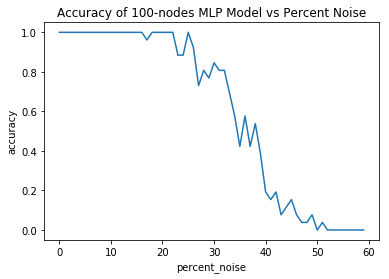

In [7]:
accuracy_noisy = []

for i in range(0, 60):
    x_noisy = add_noise(x_train, i/100)
    y_predicted = mlp.predict(x_noisy)
    accuracy_noisy.append(np.mean(y_train == y_predicted))

print(accuracy_noisy)

plt.ylabel('accuracy')
plt.xlabel('percent_noise')
plt.title("Accuracy of 100-nodes MLP Model vs Percent Noise")
plt.plot(accuracy_noisy)
plt.show()

Based on the above plot, we can see that the model generalized the noisy patterns pretty well until about 20% noise. Before 20% noise, the accuracy are mostly 1 with a few cases showing accuracies of 0.96. After 20% noise, the model accuracy starts to drop, but remained at above 0.8 accuracy until 30% noise.

After 30% noise, the model accuracy drops sharply to about 0.4 and keeps droping afterwards, finally reaching 0 at 50% noise. The slope between 20% to 30% is not as steep as the slope after 30%.

In conclusion, the model generalizes 0-20% noise patterns pretty well, and starts to lose its accuracy greatly when noise is higher than 30%. When noise is 50%, the model is unable to recognize a pattern as its true label letter.

I guess this is reasonable considering that 50% noise means 50% of the elements are flipped, completely changing the pattern. Actually, a 20% noise is enough to decrease the accuracy because a pattern with 20% noise starts to look like other patterns.

Now, I will plot the training curve and generalization curve for the 100-node MLP model.

I train it in the same way I did before, and I will feed 20%, 30%, and 50% noise patterns to the trained model in each iteration to create the generalization curve. I do this because as previously discussed, 20%, 30%, and 50% are where accuracies changes are signifiant.

C:\Users\david2\Downloads\WPy-3662\python-3.6.6.amd64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


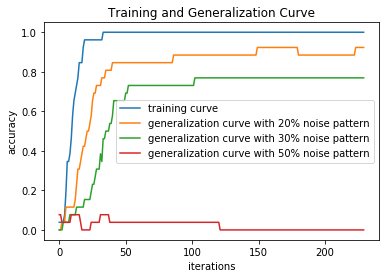

In [14]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1, verbose=False, warm_start=True)

scores_no_noise = np.array([])
scores_20_noise = np.array([])
scores_30_noise = np.array([])
scores_50_noise = np.array([])

x_20_noise = add_noise(x_train, 0.2)
x_30_noise = add_noise(x_train, 0.3)
x_50_noise = add_noise(x_train, 0.5)

#stops at 230 iterations because this model converges before 230 iterations, shown when verbose is true.
for i in range (0, 230):
    mlp.fit(x_train, y_train)
    scores_no_noise = np.append(scores_no_noise, mlp.score(x_train, y_train))
    scores_20_noise = np.append(scores_20_noise, mlp.score(x_20_noise, y_train))
    scores_30_noise = np.append(scores_30_noise, mlp.score(x_30_noise, y_train))
    scores_50_noise = np.append(scores_50_noise, mlp.score(x_50_noise, y_train))
    
plt.ylabel('accuracy')
plt.xlabel('iterations')
plt.title("Training and Generalization Curve")
plt.plot(scores_no_noise, label = 'training curve')
plt.plot(scores_20_noise, label = 'generalization curve with 20% noise pattern')
plt.plot(scores_30_noise, label = 'generalization curve with 30% noise pattern')
plt.plot(scores_50_noise, label = 'generalization curve with 50% noise pattern')
plt.legend()
plt.show()

From the above graph, we can see that as noise increases, the maximum accuracy we can get when the model converges is decreasing. On noiseless data, the accuracy can go to 1. On 50% noise, the accuracy is almost always 0.

We can also see that on every iteration, the accuracy is lower when more noisy data is used as test input. This makes sense because noise decreases prediction accuracy.

In addition, it seems like the accuracy converges slower (at higher iterations) for more noisy patterns except for 50% noise. This is probably because as iteration increases, the model's loss is decreased. For noiseless data, the accuracy can be 1 even though the loss has not converged yet. When noise increases, a smaller loss is required to reach the best possible accuracy, so those curves appear to converge slower.

# Q3

In [15]:
#load and reshape
pattern2 = np.loadtxt('pattern2.txt')
pattern2 = pattern2.reshape(1,156)

#predict it with the model trained on noiseless data
ascii = mlp.predict(pattern2)
print(ascii)
print(chr(ascii))

[75]
K


So, my 100-node model classified pattern 2 as ascii code 75, which is K. 

Of course, this only means that the model thinks K's probability is the largest, but that may or may not be the true label.

Based on previous findings, my model works good for noise level up to 20% and has ok accuracy for noise level up to 30%. So, if pattern 2's noise level is below 30%, K is likely the actual label.

# Q4

I created some new noisy patterns with my add_noise function.

I used shuffling in add_noise so each time noisy patterns are created, they'd be new ones even if the percent_noise is same.

Firstly, I want to see if noisy pattern training data affects learning, so I trained 4 models each with noiseless data, 20% noise data, 30% noise data, and 50% noise data, and I plotted the loss learning curve.

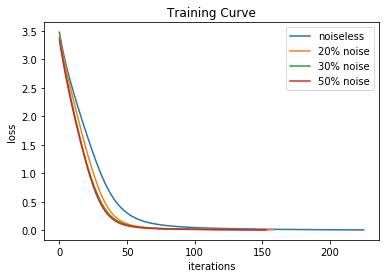

In [17]:
x_train_20 = add_noise(x_train, 0.2)
x_train_30 = add_noise(x_train, 0.3)
x_train_50 = add_noise(x_train, 0.5)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(x_train, y_train)

mlp2 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp2.fit(x_train_20, y_train)

mlp3 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp3.fit(x_train_30, y_train)

mlp5 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp5.fit(x_train_50, y_train)

plt.title("Training Curve")
plt.ylabel('loss')
plt.xlabel('iterations')
plt.plot(mlp.loss_curve_, label='noiseless')
plt.plot(mlp2.loss_curve_, label='20% noise')
plt.plot(mlp3.loss_curve_, label='30% noise')
plt.plot(mlp5.loss_curve_, label='50% noise')
plt.legend()
plt.show()

From the above graph, it can be seen that when noisy data are used for training models, the models converge faster than when using noiseless data.

Next, I will use the 3 models I trained with noisy data to predict 4 new test data sets (each containing 26 patterns): noiseless data, 20% noise data, 30% noise data, 50% noise data. Note that these noisy data are different than what I used for training because my add_noise function provides different noisy data each time.

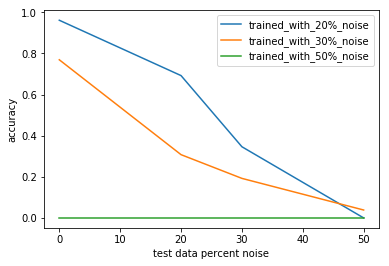

In [19]:
x_test_0 = x_train
x_test_20 = add_noise(x_train, 0.2)
x_test_30 = add_noise(x_train, 0.3)
x_test_50 = add_noise(x_train, 0.5)

#model trained with 20% noise data
model_2_accuracy = []
y_predicted_0 = mlp2.predict(x_test_0)
model_2_accuracy.append(np.mean(y_train == y_predicted_0))
y_predicted_20 = mlp2.predict(x_test_20)
model_2_accuracy.append(np.mean(y_train == y_predicted_20))
y_predicted_30 = mlp2.predict(x_test_30)
model_2_accuracy.append(np.mean(y_train == y_predicted_30))
y_predicted_50 = mlp2.predict(x_test_50)
model_2_accuracy.append(np.mean(y_train == y_predicted_50))

#model trained with 30% noise data
model_3_accuracy = []
y_predicted_0 = mlp3.predict(x_test_0)
model_3_accuracy.append(np.mean(y_train == y_predicted_0))
y_predicted_20 = mlp3.predict(x_test_20)
model_3_accuracy.append(np.mean(y_train == y_predicted_20))
y_predicted_30 = mlp3.predict(x_test_30)
model_3_accuracy.append(np.mean(y_train == y_predicted_30))
y_predicted_50 = mlp3.predict(x_test_50)
model_3_accuracy.append(np.mean(y_train == y_predicted_50))

#model trained with 50% noise data
model_5_accuracy = []
y_predicted_0 = mlp5.predict(x_test_0)
model_5_accuracy.append(np.mean(y_train == y_predicted_0))
y_predicted_20 = mlp5.predict(x_test_20)
model_5_accuracy.append(np.mean(y_train == y_predicted_20))
y_predicted_30 = mlp5.predict(x_test_30)
model_5_accuracy.append(np.mean(y_train == y_predicted_30))
y_predicted_50 = mlp5.predict(x_test_50)
model_5_accuracy.append(np.mean(y_train == y_predicted_50))

plt.ylabel('accuracy')
plt.xlabel('test data percent noise')
plt.plot([0, 20, 30, 50], model_2_accuracy, label='trained_with_20%_noise')
plt.plot([0, 20, 30, 50], model_3_accuracy, label='trained_with_30%_noise')
plt.plot([0, 20, 30, 50], model_5_accuracy, label='trained_with_50%_noise')
plt.legend()
plt.show()

The experiment above shows that if we train the models with noisy data, the more noise in the training data, the worse the performance of the models. 

This makes sense because noise are randomly generated and they deviate away from the noiseless patterns. 

So, if we train models with noisy data, the models will not be able to generalize other noisy data very well even if the percent_noise is similar because the noise is random.

Next, I will investigate the effects of hidden nodes on performance with 20% noise data as training data.

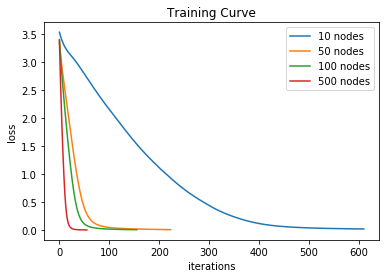

In [20]:
x_train_20 = add_noise(x_train, 0.2)

mlp10 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
mlp10.fit(x_train_20, y_train)

mlp50 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000)
mlp50.fit(x_train_20, y_train)

mlp100 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp100.fit(x_train_20, y_train)

mlp500 = MLPClassifier(hidden_layer_sizes=(500,), max_iter=1000)
mlp500.fit(x_train_20, y_train)

plt.title("Training Curve")
plt.ylabel('loss')
plt.xlabel('iterations')
plt.plot(mlp10.loss_curve_, label='10 nodes')
plt.plot(mlp50.loss_curve_, label='50 nodes')
plt.plot(mlp100.loss_curve_, label='100 nodes')
plt.plot(mlp500.loss_curve_, label='500 nodes')
plt.legend()
plt.show()

The above experiment shows that as nodes increases, the time or iterations to converge decreases. Now, I will look at number of nodes' effect on performance by using the 4 above models to predict 4 new test data sets (each containing 26 patterns): noiseless data, 20% noise data, 30% noise data, 50% noise data.

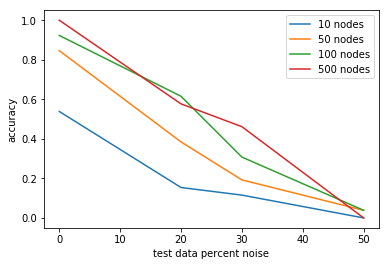

In [30]:
x_test_0 = x_train
x_test_20 = add_noise(x_train, 0.2)
x_test_30 = add_noise(x_train, 0.3)
x_test_50 = add_noise(x_train, 0.5)

#10 nodes model trained with 20% noise data
model_10_accuracy = []
y_predicted_0 = mlp10.predict(x_test_0)
model_10_accuracy.append(np.mean(y_train == y_predicted_0))
y_predicted_20 = mlp10.predict(x_test_20)
model_10_accuracy.append(np.mean(y_train == y_predicted_20))
y_predicted_30 = mlp10.predict(x_test_30)
model_10_accuracy.append(np.mean(y_train == y_predicted_30))
y_predicted_50 = mlp10.predict(x_test_50)
model_10_accuracy.append(np.mean(y_train == y_predicted_50))

#50 nodes model trained with 30% noise data
model_50_accuracy = []
y_predicted_0 = mlp50.predict(x_test_0)
model_50_accuracy.append(np.mean(y_train == y_predicted_0))
y_predicted_20 = mlp50.predict(x_test_20)
model_50_accuracy.append(np.mean(y_train == y_predicted_20))
y_predicted_30 = mlp50.predict(x_test_30)
model_50_accuracy.append(np.mean(y_train == y_predicted_30))
y_predicted_50 = mlp50.predict(x_test_50)
model_50_accuracy.append(np.mean(y_train == y_predicted_50))

#100 nodes model trained with 50% noise data
model_100_accuracy = []
y_predicted_0 = mlp100.predict(x_test_0)
model_100_accuracy.append(np.mean(y_train == y_predicted_0))
y_predicted_20 = mlp100.predict(x_test_20)
model_100_accuracy.append(np.mean(y_train == y_predicted_20))
y_predicted_30 = mlp100.predict(x_test_30)
model_100_accuracy.append(np.mean(y_train == y_predicted_30))
y_predicted_50 = mlp100.predict(x_test_50)
model_100_accuracy.append(np.mean(y_train == y_predicted_50))

#500 nodes model trained with 50% noise data
model_500_accuracy = []
y_predicted_0 = mlp500.predict(x_test_0)
model_500_accuracy.append(np.mean(y_train == y_predicted_0))
y_predicted_20 = mlp500.predict(x_test_20)
model_500_accuracy.append(np.mean(y_train == y_predicted_20))
y_predicted_30 = mlp500.predict(x_test_30)
model_500_accuracy.append(np.mean(y_train == y_predicted_30))
y_predicted_50 = mlp500.predict(x_test_50)
model_500_accuracy.append(np.mean(y_train == y_predicted_50))

plt.ylabel('accuracy')
plt.xlabel('test data percent noise')
plt.plot([0, 20, 30, 50], model_10_accuracy, label='10 nodes')
plt.plot([0, 20, 30, 50], model_50_accuracy, label='50 nodes')
plt.plot([0, 20, 30, 50], model_100_accuracy, label='100 nodes')
plt.plot([0, 20, 30, 50], model_500_accuracy, label='500 nodes')
plt.legend()
plt.show()

The above experiment shows that when the noise level of the training data is the same, as number of hidden nodes increases, the performance of the model generally increases. The graph shows that model with 500 nodes show better accuracy than models with less nodes for test data up to 40% noise level. After 40% noise level test data, the models are fairly similar.

In conclusion, I'll say that the number of nodes helps to improve performance. So, when training data and testing data has noise, which decreases accuracy, it is a good idea to add more nodes. However, if the noise level is too great, then adding nodes will not help much.

# Q5

Q5 is in the other notebook in the same zip file as this one, please visit there, sorry for the inconvenience.

# Q6

There are some typo kind of errors. For example, on first line of Preface, "Machine learning is now a big [missing a word here]". Also, in Fig 2.1, Jupyter is called Jupyder.

In section 2.5 Additional Constructs, the code is not organized into lines or indented, which makes it hard to understand.

In section 3.1:

x_train = iris_data[1:-1:2,0:4]

y_train = np.int32(iris_data[1:-1:2,4])

x_test = iris_data[0:-1:2,0:4]

y_test = np.int32(iris_data[0:-1:2,4])

I think that is a small error because if we do 0:-1:2, then -1 is the last row in python, so python stop at before the last row, and the last row is not included in training or testing data. I think it's better to use '[1::2,0:4]' for training data so we can include the last row in training data.